<a href="https://colab.research.google.com/github/eun-88/Statistics-wrap-up-project-/blob/main/EYmainquest03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install kagglehub

In [4]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

100%|██████████| 7.13M/7.13M [00:00<00:00, 97.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tunguz/online-retail/versions/1


(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [8]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [9]:
# 1000개의 무작위 표본 추출
sample_df = df.sample(n=1000, random_state=42)

# 통계량 계산
pop_mean = df['TotalPrice'].mean()
pop_std = df['TotalPrice'].std()
sample_mean = sample_df['TotalPrice'].mean()
sample_std = sample_df['TotalPrice'].std()

print(f"모집단 평균: {pop_mean:.2f}, 표준편차: {pop_std:.2f}")
print(f"표본 평균: {sample_mean:.2f}, 표준편차: {sample_std:.2f}")

모집단 평균: 17.99, 표준편차: 378.81
표본 평균: 16.83, 표준편차: 64.47


중심극한정리란 , (Central Limit Theorem,CLT)
모집단의 분포가 무엇이든 상관없이 표본의 크기가 충분히 크다면 "표본의 평균"들의 분포가 정규분포에 근사하다는 정리이다.

그래서 이 문제에서도 1000개라는 데이터 자체가 , 비록 random하게 설정되었을지라도 충분히 큰 숫자이기때문에,

표본의 평균은 중심극한정리에 따라 모집단 평균과 비슷하게 나오게 된다.

단, 표준편차의 경우는 데이터의 변동성, 여기에서는 각 total price의 차이가 크기 때문에 차이가 나타날 수 있지만

선택된 표본평균은 모집단의 평균을 매우 안정적으로 추정하고 있다고 설명 가능하다.


## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [10]:
from scipy import stats

# 상위 2개 국가 찾기 (주문 건수 기준)
top_countries = df['Country'].value_counts().nlargest(2).index
country1 = df[df['Country'] == top_countries[0]]['TotalPrice']
country2 = df[df['Country'] == top_countries[1]]['TotalPrice']

# 독립표본 t-검정 (등분산 가정 X, Welch's t-test)
t_stat, p_value = stats.ttest_ind(country1, country2, equal_var=False)

print(f"대상 국가: {top_countries[0]}, {top_countries[1]}")
print(f"t-통계량: {t_stat:.4f}, p-값: {p_value:.4f}")

대상 국가: United Kingdom, Germany
t-통계량: -10.0464, p-값: 0.0000


이 문제는 통계적 가설 검정의 핵심을 다루는 문제이다.

첫번째로 각각의 정의에 대해 알아보겠다.

1. 독립표본 t-검정
서로다른 두 집단의 평균값에 통계적으로 유의미한 차이가 있는지 확인하는 방법
2. t 통계량
두 집단 평균의 차이를 '데이터의 변동성(표준오차)'로 나는 값. 절대값이 0에서 멀어질수록 차이가 크다고 해석한다.
3. p값(p-value)
두집단의 평균이 사실 같다 (귀무가설) 로 가정했을때 , 현재와 같은 데이터 차이가 관찰될 확률

p<0.05 차이가 우연히 나타날 확률이 0.5 미만이므로, 우연히 나타날 확률이 매우 낮으므로 통계적으로 의미가 있다고 생각 . 진짜 차이라고 해석 (귀무가설 기각)

p>0.05 차이가 우연히 나타날 확률이 이정도로 나타날 수 있기에 차이가 있다고 보기 어려워 귀무가설을 채택.


값을 살펴보자면
대상국가 UK와 Germany사의의
t - 통계량은 -10.0464로 0에서부터 매우 멀어져 있으며 두 집단의 평균이 매우 차이가 크다. 이 경우 Germany의 total price가 큰것으로 보인다.

p값의 경우는 0.0000으로 유의수준인 0.05보다 작아 귀무가설을 기각한다.


그런데 만약 우리가 이러한 의사결정에 오류가 있다라고 생각해본다면
1종오류 : 실제로는 두 국가의 소비패턴이 같은데 우리가 다르다라고 잘못 결론을 내릴 위험.

-> p값이 0.0000에 가깝기에 1종오류를 범할 확률이 극히 낮고

2종 오류 : 실제로는 차이가 있는데 우리가 차이가 없다라고 생각을 하게 된다면

이미 귀무가설을 기각하고 대립가설을 선택한 상태이기 때문에 2종오류가 나올 가능성이 없다.



## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

--- 3번: 주중/주말 UnitPrice 상세 통계량 ---
               mean   50%       std   variance   25%   75%
IsWeekend                                                 
Weekday    3.340081  2.10  3.612177  13.047820  1.25  4.13
Weekend    2.798490  1.85  2.907602   8.454148  1.25  3.75


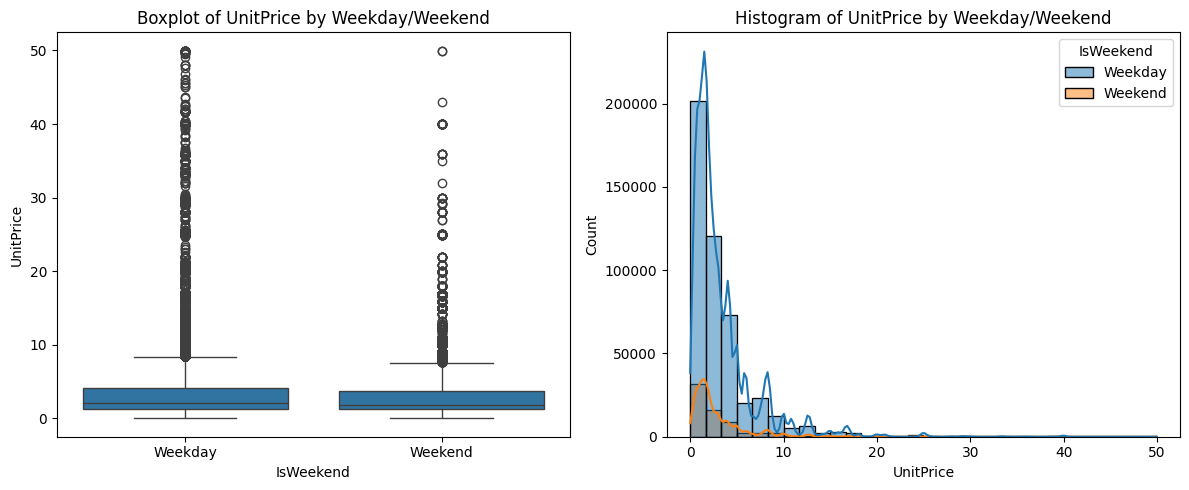

In [11]:
# 1. 주중(Weekday), 주말(Weekend) 구분 컬럼 생성
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# 2. 데이터 전처리: UnitPrice가 0보다 크고 이상치(50달러 미만)를 제외한 데이터 필터링
df_clean = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < 50)].copy()

# 3. 기술통계량 계산 (중심경향치, 변산성, 분위수)
stats_comparison = df_clean.groupby('IsWeekend')['UnitPrice'].describe(percentiles=[.25, .5, .75])
stats_comparison['variance'] = df_clean.groupby('IsWeekend')['UnitPrice'].var() # 분산 추가

print("--- 3번: 주중/주말 UnitPrice 상세 통계량 ---")
# mean(평균), 50%(중간값), std(표준편차), variance(분산), 25%(1사분위), 75%(3사분위)
print(stats_comparison[['mean', '50%', 'std', 'variance', '25%', '75%']])

# 4. 시각화 (상자수염그림과 히스토그램)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# 상자수염그림 (Boxplot)
plt.subplot(1, 2, 1)
sns.boxplot(x='IsWeekend', y='UnitPrice', data=df_clean)
plt.title('Boxplot of UnitPrice by Weekday/Weekend')

# 히스토그램 (Histogram)
plt.subplot(1, 2, 2)
sns.histplot(data=df_clean, x='UnitPrice', hue='IsWeekend', kde=True, bins=30)
plt.title('Histogram of UnitPrice by Weekday/Weekend')

plt.tight_layout()
plt.show()

 전체 주중/주말의 상세통계량을 살펴보면
주중 주말의
중위값 대비 평균값이 높은것으로 보아 , 몇몇 고가 제품이 빈도수 있게 판매되고 있음을 확인 할 수 있으며 ,
표준편차의 차이가 크지 않은것으로보아 요일별 차이가 많지 않은 것으로 보인다.
다만, weekday의 outlier 가 더 많은것으로 보아 고가품거래가 더 빈번하게 일어나는 것으로 보인다.

이는 boxplot의 모양이 거의 비슷하나 상자 위쪽으로 이상치들의 빈도수가 weekday에서 더 많이 발견되는것을 통해 알수 있다.

Histogram을 통해 대부분 Unitprice가 0~10 사이의 제품이 가장 많이 팔리고 있다는 것을 알 수 있으며, weekday와 weekend의 선 모양이 거의 동일한것으로 보아
요일별로 패턴이 거의 비슷하다고 볼 수 있다.


## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# [1] 데이터 정리 및 결측치/이상치 제거
# 1. 필요한 컬럼만 추출하고 결측치가 있는 행 제거
df_reg = df.dropna(subset=['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth'])

# 2. 이상치 제거 (정상적인 판매 범위를 벗어난 데이터 필터링)
# - Quantity: 0보다 크고 500개 미만 (반품 및 대량 특수 주문 제외)
# - UnitPrice: 0보다 크고 50달러 미만 (비정상적 단가 제외)
df_reg = df_reg[(df_reg['Quantity'] > 0) & (df_reg['Quantity'] < 500)]
df_reg = df_reg[(df_reg['UnitPrice'] > 0) & (df_reg['UnitPrice'] < 50)]

# [2] 범주형 변수 처리 (Country)
# 문자열인 국가명을 모델이 이해할 수 있도록 수치(Label Encoding)로 변환
df_reg['Country_Code'] = pd.factorize(df_reg['Country'])[0]

# [3] 변수 설정
# 독립변수(X): UnitPrice, Country_Code, DayOfWeek, InvoiceMonth
X = df_reg[['UnitPrice', 'Country_Code', 'DayOfWeek', 'InvoiceMonth']]
# 종속변수(y): Quantity
y = df_reg['Quantity']

# [4] 데이터 분할 및 모델 학습 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# [5] 결과 측정
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("--- 4번: 회귀 분석 결과 ---")
print(f"결정계수 (R-squared): {r2:.4f}")
print("\n[회귀계수 (Coefficients)]")
coeff_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coeff_df)

--- 4번: 회귀 분석 결과 ---
결정계수 (R-squared): 0.0338

[회귀계수 (Coefficients)]
       Variable  Coefficient
0     UnitPrice    -1.062082
1  Country_Code     0.631507
2     DayOfWeek    -0.254634
3  InvoiceMonth    -0.050912


먼저 , 회귀계수와 결정계수의 정의에 대해 알아보자.
1. 회귀계수
회귀분석은 독립변수x와 종속변수 y의 관계를 하나의 직선으로 만드는 과정이다. (y=ax+b)
여기서 회귀계수 (a)는 직선의 기울기, 즉 원인 X가 변하면 Y는 얼마나 변하는가? 를 나타내는 수치이다.

계수가 양수라면 함께 증가, 계수가 음수라면 X가 증가할때마다 Y가 작아진다는 의미이며, 절대값이 클수록 영향력이 크다는 의미이다.


2. 결정계수 (R-squared)
결정계수는 내가 만든 이 회귀모델이 얼마나 실제 데이터를 잘 대변하고 있는지를 0~1사이로 나타낸 것으로 숫자가 클수록 신빙성이 있다고 말할수있다.
(해당 인과관계가 명확하다는 의미겠다)

그렇다면 이 모델의 설명력은 R - squared 를 보았을때 약 3.38%이며 ,
상품의 단가, 국가, 요일, 월이 판매수량이 변하는 이유의 3.38% 정도를 설명해준다는 의미이다.

각각의 회귀계수를 살펴보면

[회귀계수 (Coefficients)]
       Variable  Coefficient
0     UnitPrice    -1.062082 -> 가격이 오를때마다 판매가 줄어든다
1  Country_Code     0.631507 -> 국가별로 판매수량에 차이가 있다.
2     DayOfWeek    -0.254634 -> 요일별로 미세한 차이가 있다
3  InvoiceMonth    -0.050912 -> 월별 차이는 아주 미세하다.


로 상기와 같이 확인될 수 있다.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 1. IsReturn 피쳐 생성 (Quantity가 음수이면 반품: 1, 아니면 정상: 0)
df['IsReturn'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)

# 2. 전처리 및 결측치 제거
# 모델 학습에 필수적인 변수들에 결측치가 있는 행은 제거합니다.
df_log = df.dropna(subset=['UnitPrice', 'CustomerID', 'Country'])

# 3. 피쳐 선정 (상태, 국가, 요일, 월 등 활용)
# Country는 범주형이므로 get_dummies를 통해 수치화합니다.
X_log = pd.get_dummies(df_log[['UnitPrice', 'DayOfWeek', 'InvoiceMonth', 'Country']], drop_first=True)
y_log = df_log['IsReturn']

# 4. 데이터셋 분할 (Train 8: Test 2, stratify를 통해 반품 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42, stratify=y_log
)

# 5. 로지스틱 회귀 모델 학습 (데이터 불균형 해결 옵션 추가)
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)

# 6. 예측 및 성능 평가
y_pred = lr_model.predict(X_test)

print("--- [혼동 행렬 (Confusion Matrix)] ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- [분류 리포트 (Classification Report)] ---")
# 정밀도(Precision), 재현율(Recall), F1-score가 한 번에 출력됩니다.
print(classification_report(y_test, y_pred))

--- [혼동 행렬 (Confusion Matrix)] ---
[[53999 25586]
 [  909   872]]

--- [분류 리포트 (Classification Report)] ---
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     79585
           1       0.03      0.49      0.06      1781

    accuracy                           0.67     81366
   macro avg       0.51      0.58      0.43     81366
weighted avg       0.96      0.67      0.79     81366



먼저, IsReturn은 이 거래가 반품된 거래인지 아닌지를 나타내기 위해 만든 분류용 변수이다.

그래서  (Quantity가 음수이면 반품: 1, 아니면 정상: 0) , 음수여부에 따라 반품과 정상 거래를 먼저 구분하였다 .

출력된 로지스틱스 회귀를 보고 결과를 살펴보자면

1. 혼동행렬 (confusion matrix)
TP (True Positive) : 872 , 1을 1이라고 판단
TN (True Negative) : 53999 , 0을 0이라고 판단
FP (False Positive) : 25586 , 0 을 1이라 판단
FN (False Negative) : 909 ,1 을 0이라고 판단.

정상거래인 0을 맞추는 정밀도 확률은 98% 이지만, 반품거래를 판단하는 정밀도는 3%로 낮은편이다.

실제반품건수 중 약 49%를 반품될것으로 찾아내었으며, ( recall =49%)

정밀도와 재현율의 조화평균을 보는 F1-Score의 경우 반품과 정상의 수치가 차이가 나는것으로 보아 현재 이 모델이 불안하다고 판단된다.

즉, 전체적으로 재현율이 0.49정도 되지만, FP수치가 높아 정밀도가 낮은 상태이다.

해당 모델의 성능을 향상시키기 위해서는

1) 샘플링 기법 적용 : 현재 반품 데이터가 적기 때문에 데이터를 인위적으로 생성하는 SMOTE 기법을 사용해서 데이터의 균형을 맞춘다.

2) 새로운 Feature 추가 : 반품의 데이터의 정확성을 높이기 위해 반품관련, 반품이력 혹은 상품별 반품율등 새로운 Feature를 추가해 데이터의 정확성을 올린다.

3) 모델 고도화
로지스틱 회귀는 선형적인 관계만 파악하므로, 비선형 관계를 파악할수 있는
추가 모델을 ( ex. Random Forest ) 등을 파악하여 성능을 개선한다.



